# Classical Decomposition
**Reference: https://otexts.com/fpp2/classical-decomposition.html**
### 1. Additive Decomposition

### 2. Multiplicative Decomposition

We assume that the seasonal component is constant from year to year.


### Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Sequence
from timeseries import moving_average_methods

def draw_plots(*args):

    num = len(args)
    
    fig, axs = plt.subplots(num,1,constrained_layout=True)
    fig = plt.figure(constrained_layout = True)

    for i in range(num):
        axs[i].plot(args[i])
    
    plt.show()

    return None

### Preparation of Dataset

***Used Dataset : https://fred.stlouisfed.org/series/PCU3359133591***

In [5]:
df = pd.read_csv("./datasets/PCU3359133591.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           248 non-null    object 
 1   PCU3359133591  248 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [7]:
df.columns = ['Date', 'Price']

In [8]:
df['Date'][0], df['Date'][len(df)-1]

('2003-12-01', '2024-07-01')

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

### Additive Decomposition

In [11]:
def classical_decompostion(
    timeseries: pd.core.frame.DataFrame,
    form: str ='additive',
    seasonal_period: str ='m',
    fig: bool = 'False',
)->tuple[Sequence]:
    '''
    The parameter 'timeseries' must have 2 columns: 'Date', 'Price', 
    and The column 'Date' should consist of pandas.Timestamp objects.

    There are 2 options for the parameter 'form': 'additive' and 'multiplicative'.
    There are 7 options for the parameter 'unit': 'quarterly', 'monthly', 'daily', 'q', 'm', 'd', and int value
    '''
    # Setup
    import numpy as np
    
    # Seasonal Period
    if seasonal_period in ['quarterly', 'q']:
        m = 4 # for quarterly data
        interest_period = timeseries['Date'].map(lambda x : x.quarter)
        
    elif seasonal_period in ['monthly', 'm']:
        m = 12 # for monthly data
        interest_period = timeseries['Date'].map(lambda x : x.month)
        
    elif seasonal_period in ['daily', 'd']:
        m = 7 # for daily data with a weekly pattern
        interest_period = timeseries['Date'].map(lambda x : x.day_of_week)
        
    elif type(seasonal_period) == int:
        raise Exception("not yet")
        
    else:
        raise ValueError("There are 3 options for the parameter 'unit': 'quarterly', 'monthly', 'daily', 'q', 'm', 'd'")

    # Step1: 
    '''
    Compute the trend-cycle component T
    '''
    y = timeseries['Price']

    if m % 2 == 0:
        window_size = 2*m
    else:
        window_size = m
        
    T = np.array(moving_average_methods(y, window_size))


    # Step2: 
    '''
    Calculate the detrended series y-T
    '''
    detrended_series = y - T

    # Step3: 
    '''
    To estimate the seasonal component for each season, 
    simply average the detrended values for that season.
    '''
    S_list = []
    
    for i in range(1, m+1):
        subset = timeseries.loc[interest_period==i, 'Price']
        seasonal_component = sum(subset)/len(subset)
        S_list.append(seasonal_component)

    S = [S_list[x-1] for x in interest_period]

    # Step4: 
    '''
    The remainder component is calculated by subtracting the estimated seasonal and trend-cycle components
    R = y - T - S
    R = detrended_series - S
    '''
    R = detrended_series - S

    # Draw plots of data, trend, seasonal index, and remainder
    if fig == True:
        draw_plots(y, T, S, R)
        
    return y, T, S, R
     

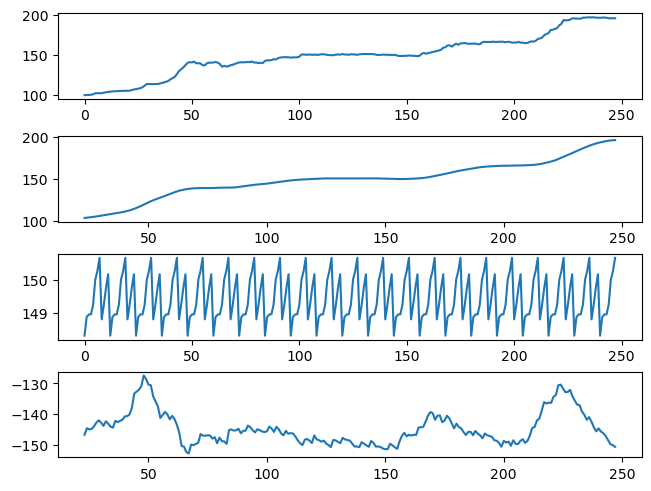

<Figure size 640x480 with 0 Axes>

In [12]:
y, T, S, R = classical_decompostion(df, fig=True )